# Dataset info

Source: 
<br>Steinmetz et al., [Distributed coding of choice, action and engagement across the mouse brain](https://www.nature.com/articles/s41586-019-1787-x), Nature, 2019
<br>* See [this video](https://www.youtube.com/watch?v=WXn4-FpVaOo) for more info

# General: 

<br> - Neuropixels recordings
<br> - 39 sessions (10 mice)
<br> - 42 brain regions (~ 30,000 neurons)
<br> - Visual discrimination task (active)

<br>Fig.1 of [source paper](https://www.nature.com/articles/s41586-019-1787-x)
<br>
<br>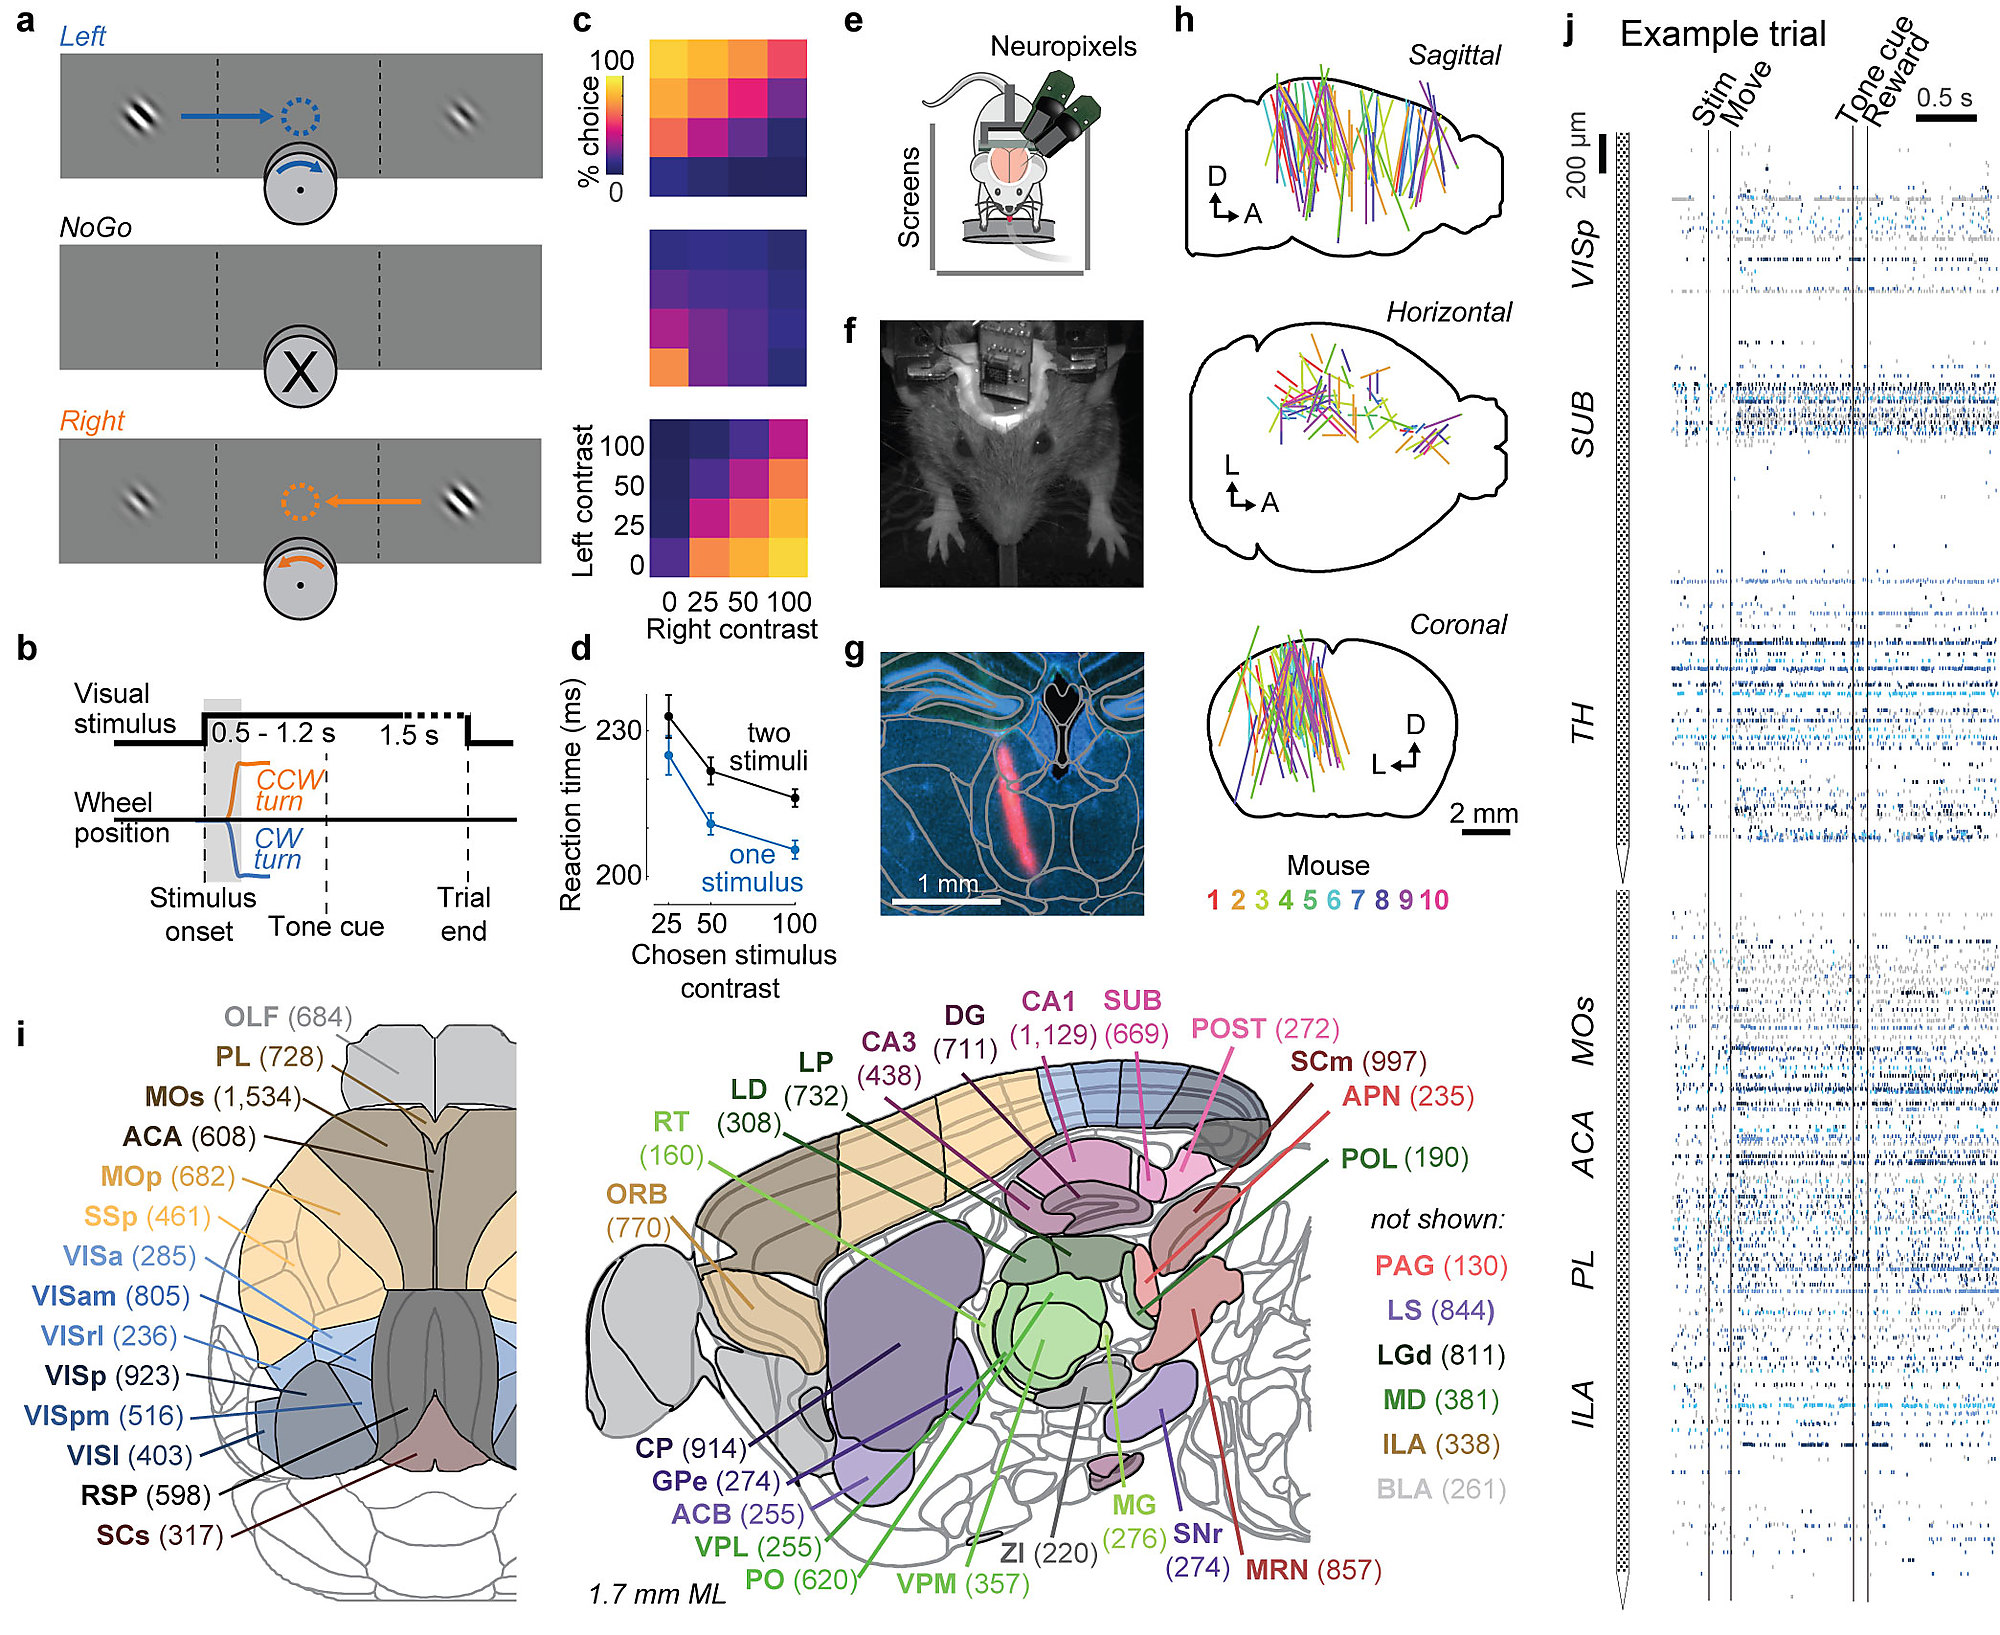

One sample session (session 08) of the steinmetz data. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast.

<br> `dat` has the fields below. 
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  

Original dataset is in [this link](https://figshare.com/articles/dataset/Dataset_from_Steinmetz_et_al_2019/9598406). Copyright to [Neuromatch Academy](https://github.com/NeuromatchAcademy/course-content/blob/main/projects/neurons/load_steinmetz_decisions.ipynb) (with edits). 

# Load Data

In [42]:
# imports

from scipy.io import loadmat
import mat73
import numpy as np

from  scipy.ndimage import gaussian_filter as smooth

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

In [100]:
datadir = '../Data/data_steinmetz.mat'
tmp_data = loadmat(datadir)

vars_to_include = list(tmp_data.keys())[3:]
dat = {}
for item in vars_to_include:
  dat[item] = tmp_data[item]

brain_reg = [tmp_nm.strip() for tmp_nm in dat['brain_area']]
# dat["spks"] = dat["spks"] * 100

print(f'Neuronal data shape (Neuron, Trial, Time): {dat["spks"].shape}')
print(f'Regions: {np.unique(dat["brain_area"]).tolist()}')

tr_num = dat["spks"].shape[1]

prestim_time = 500 # pre-stimulus time in ms
timestamps = (np.arange(dat["spks"].shape[2])*10 - prestim_time) / 1000

Neuronal data shape (Neuron, Trial, Time): (1156, 250, 250)
Regions: ['CA1 ', 'CA3 ', 'DG  ', 'ILA ', 'LD  ', 'LP  ', 'LSr ', 'MOs ', 'PL  ', 'PO  ', 'SUB ', 'TT  ', 'VISa', 'VISp', 'root']


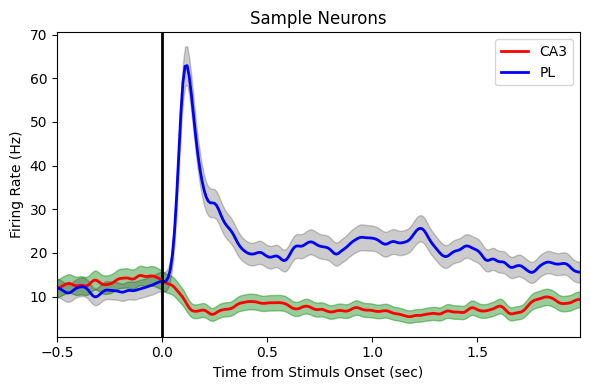

In [142]:
smooth_win = 2

tmp_reg = 'CA3'; tmp_idx = 13
idx_reg = [idx for idx, reg in enumerate(brain_reg) if reg==tmp_reg]
tmp_n = dat['spks'][idx_reg[tmp_idx]]

plt.figure(figsize=(6,4))
plt.plot(timestamps, smooth(tmp_n.mean(axis=0), smooth_win) *100, color='r', lw=2, label=tmp_reg)
plt.fill_between(timestamps, smooth(tmp_n.mean(axis=0) + tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win) *100
                 , smooth(tmp_n.mean(axis=0) - tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win) *100
                 , color='g', alpha=.4)


tmp_reg = 'PL'; tmp_idx = 1
idx_reg = [idx for idx, reg in enumerate(brain_reg) if reg==tmp_reg]
tmp_n = dat['spks'][idx_reg[tmp_idx]]

plt.plot(timestamps, smooth(tmp_n.mean(axis=0), smooth_win) *100, color='b', lw=2, label=tmp_reg)
plt.fill_between(timestamps, smooth(tmp_n.mean(axis=0) + tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win) *100
                 , smooth(tmp_n.mean(axis=0) - tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win) *100
                 , color='k', alpha=.2)

plt.xlabel('Time from Stimuls Onset (sec)')
plt.xlim([min(timestamps), max(timestamps)])
plt.ylabel('Firing Rate (Hz)')
# plt.ylim([0,80])

plt.axvline(0, color='k', lw=2)
plt.title('Sample Neurons')
plt.legend()
plt.tight_layout()